# Exercise 3

This notebook shows how we can perform linear regression on a dataset.

We generate a noisy dataset:

In [35]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [36]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

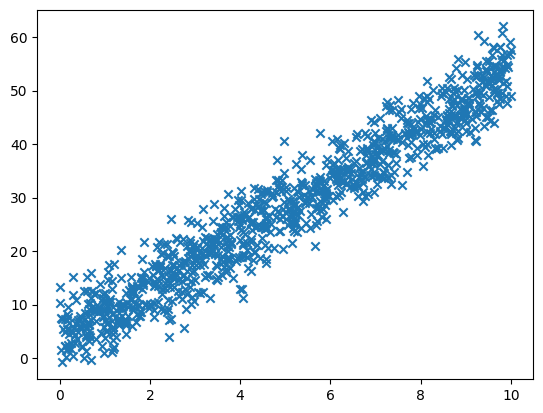

In [38]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Implement the gradient as in the previous notebook, but this time use the [torch.nn.MSELoss](https://pytorch.org/docs/stable/nn.html#mseloss) class for the loss calculation. Also, use a pytorch optimizer such as [torch.optim.SGD](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) instead of updating the weights manually. Using an optimizer is done in the following way:
 
```python
optimizer = optim.SGD([weights], lr=my_learning_rate)
   
# in the optimization loop:
optim.zero_grad() # equivalent to weights.grad.zero_()
# loss calculation here, then
optim.step() # equivalent to weights -= learning_rate*weights.grad
```

 In models with many weight tensors, using an optimizer is way easier than updating them all individually. Also, using different optimizers is as easy as using a different `torch.optim` class.

## Solution

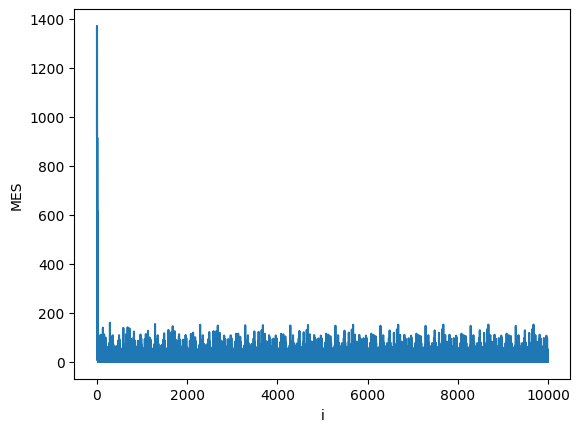

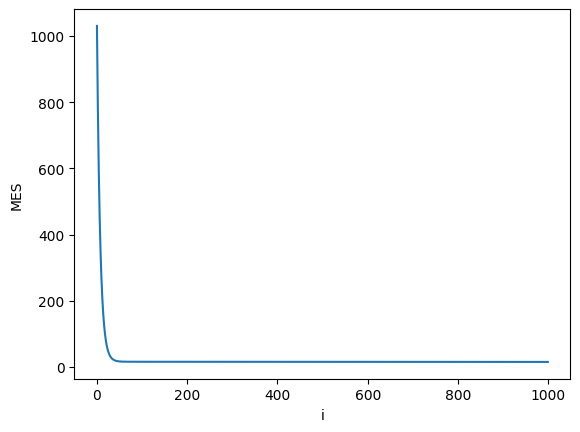

In [41]:

import torch
import torch.nn as nn
import torch.optim as optim
def generate_weights(num_features):
    np.random.seed(42) # this is just so that we all generate the same weights and thus get the same results
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights = generate_weights(X.shape[-1] + 1) # +1 because you will add the column of ones later on


weights_torch = torch.tensor(weights, dtype=torch.float,requires_grad=True)
X_torch =torch.as_tensor(X,dtype=torch.float)
y_torch =torch.as_tensor(y,dtype=torch.float)


   

def gradient_loop_SGD(y,w,X,iterations):
    my_learning_rate=1/1000
    loss_vec=np.empty(iterations*1000)
    model = torch.nn.Linear(1, 1)
    criterion = torch.nn.MSELoss()
    model.state_dict()['weight'][0] = w[0]
    model.state_dict()['bias'][0] = w[1]
    optimizer = optim.SGD(model.parameters(), lr=torch.as_tensor(my_learning_rate),)
    for i in range(0,iterations):
        for k in range(0,len(X)):
            optimizer.zero_grad()
            y_pred=model(X[k])
            loss=criterion(y_pred,y[k])
            loss_vec[i*1000+k]=loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
    return (loss_vec,optimizer)
iterations=10
(loss_vec,opt)=gradient_loop_SGD(y_torch,weights_torch,X_torch,iterations)
plt.figure()
plt.plot(np.arange(0, iterations*1000),loss_vec)
plt.xlabel("i")
plt.ylabel('MES')
plt.show()      
weights_torch = torch.tensor(weights, dtype=torch.float,requires_grad=True)
#uses the SGD optimizer but with batch optimization
def gradient_loop_SGD2(y,w,X,iterations):
    my_learning_rate=1/1000
    loss_vec=np.empty(iterations)
    model = torch.nn.Linear(1, 1)
    criterion = torch.nn.MSELoss()
    model.state_dict()['weight'][0] = w[0]
    model.state_dict()['bias'][0] = w[1]
    optimizer = optim.SGD(model.parameters(), lr=torch.as_tensor(my_learning_rate),)
    for i in range(0,iterations):
            optimizer.zero_grad()
            y_pred=model(X)
            loss=criterion(y_pred,y)
            loss_vec[i]=loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
    return (loss_vec,optimizer)
iterations=1000
(loss_vec,opt)=gradient_loop_SGD2(y_torch,weights_torch,X_torch,iterations)
plt.figure()
plt.plot(np.arange(0, iterations),loss_vec)
plt.xlabel("i")
plt.ylabel('MES')
plt.show()  
